### Mengimport Library

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import joblib
from urllib.parse import urlparse
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

### Loading Data

In [51]:
df = pd.read_csv("phishingURL_detection_dataset.csv")

In [52]:
print("Preview data:")
print(df.head())

Preview data:
   qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
0            2               0                  0              0   
1            4               0                  0              2   
2            1               0                  0              1   
3            2               0                  0              3   
4            1               1                  0              4   

   qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  \
0                     0              0           0            0   
1                     0              0           0            0   
2                     0              0           0            0   
3                     0              0           0            0   
4                     0              0           0            0   

   qty_exclamation_url  qty_space_url  qty_tilde_url  qty_comma_url  \
0                    0              0              0              0   
1                    0          

In [53]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   qty_dot_url           58645 non-null  int64
 1   qty_hyphen_url        58645 non-null  int64
 2   qty_underline_url     58645 non-null  int64
 3   qty_slash_url         58645 non-null  int64
 4   qty_questionmark_url  58645 non-null  int64
 5   qty_equal_url         58645 non-null  int64
 6   qty_at_url            58645 non-null  int64
 7   qty_and_url           58645 non-null  int64
 8   qty_exclamation_url   58645 non-null  int64
 9   qty_space_url         58645 non-null  int64
 10  qty_tilde_url         58645 non-null  int64
 11  qty_comma_url         58645 non-null  int64
 12  qty_plus_url          58645 non-null  int64
 13  qty_asterisk_url      58645 non-null  int64
 14  qty_hashtag_url       58645 non-null  int64
 15  qty_dollar_url        58645 non-null  

Output menunjukkan bahwa dataset memiliki 58645 entri dan 20 kolom. Semua kolom memiliki tipe data int64 dan tidak ada nilai null (58645 non-null entries untuk semua kolom).

In [54]:
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
        qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
count  58645.000000    58645.000000       58645.000000   58645.000000   
mean       2.284338        0.457123           0.171285       1.937522   
std        1.473209        1.339340           0.801919       2.037525   
min        1.000000        0.000000           0.000000       0.000000   
25%        2.000000        0.000000           0.000000       0.000000   
50%        2.000000        0.000000           0.000000       1.000000   
75%        3.000000        0.000000           0.000000       3.000000   
max       24.000000       35.000000          21.000000      44.000000   

       qty_questionmark_url  qty_equal_url    qty_at_url   qty_and_url  \
count          58645.000000   58645.000000  58645.000000  58645.000000   
mean               0.014102       0.311177      0.033456      0.212959   
std                0.138156       1.159198      0.343272      1.130323   
min                0.

### Exploratory Data Analysis (EDA)

#### Memeriksa dan menampilkan jumlah nilai yang hilang (missing values) untuk setiap kolom dalam DataFrame.

In [55]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
qty_equal_url           0
qty_at_url              0
qty_and_url             0
qty_exclamation_url     0
qty_space_url           0
qty_tilde_url           0
qty_comma_url           0
qty_plus_url            0
qty_asterisk_url        0
qty_hashtag_url         0
qty_dollar_url          0
qty_percent_url         0
qty_tld_url             0
length_url              0
phishing                0
dtype: int64


Tidak ada nilai yang hilang di semua kolom.

#### Menghitung dan menampilkan jumlah baris duplikat dalam DataFrame.

In [56]:
print("\nNumber of duplicates:", df.duplicated().sum())


Number of duplicates: 44797


Terdapat 44797 baris duplikat. Ini adalah jumlah yang sangat signifikan. Duplikat tidak akan ditanganin karena variasi fitur numerik yang memungkinkan adalanya link URL dengan jumlah elemen yang sama.

#### Memeriksa distribusi fitur numerik

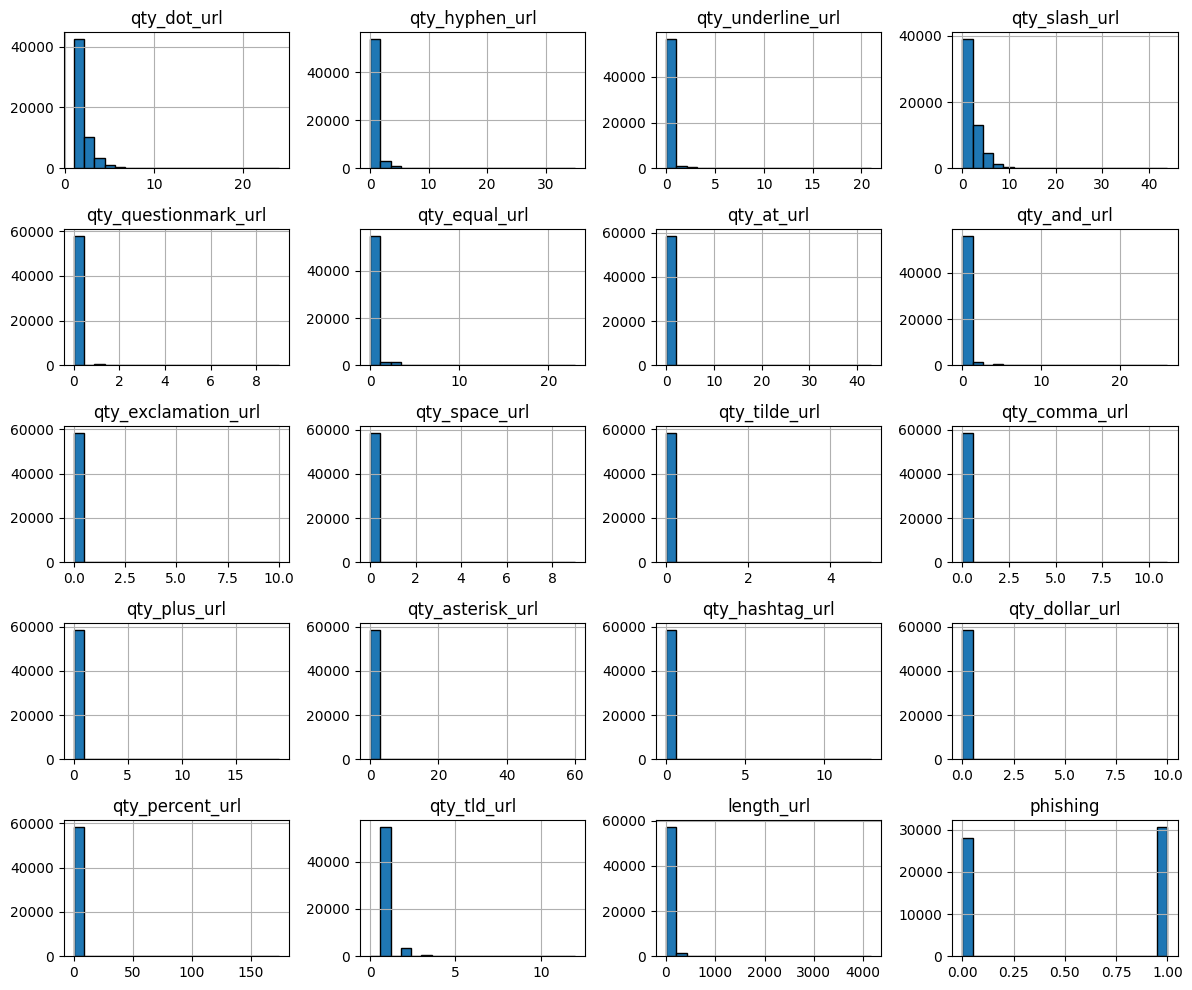

In [100]:
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

#### Memeriksa distribusi label phishing dan legimate URL

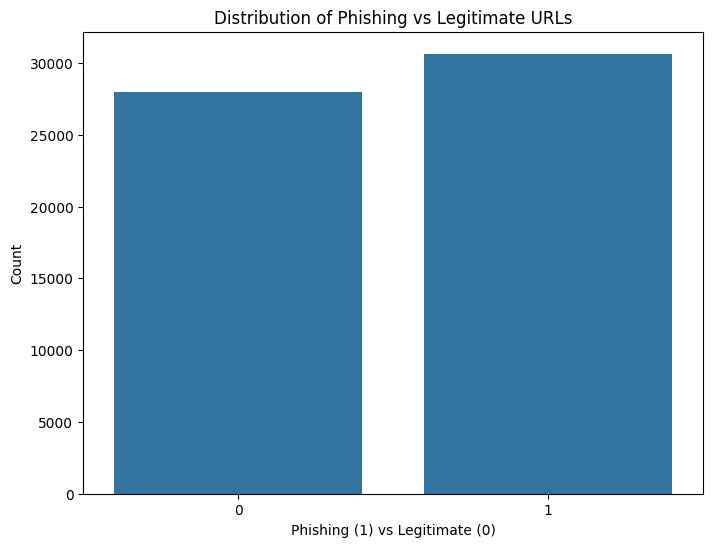


Target distribution (%):
phishing
1    52.258505
0    47.741495
Name: proportion, dtype: float64


In [57]:
# Target distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='phishing', data=df)
plt.title('Distribution of Phishing vs Legitimate URLs')
plt.xlabel('Phishing (1) vs Legitimate (0)')
plt.ylabel('Count')
plt.show()

# Percentage distribution
target_dist = df['phishing'].value_counts(normalize=True) * 100
print("\nTarget distribution (%):")
print(target_dist)

#### Memeriksa korelasi antar fitur dengan label

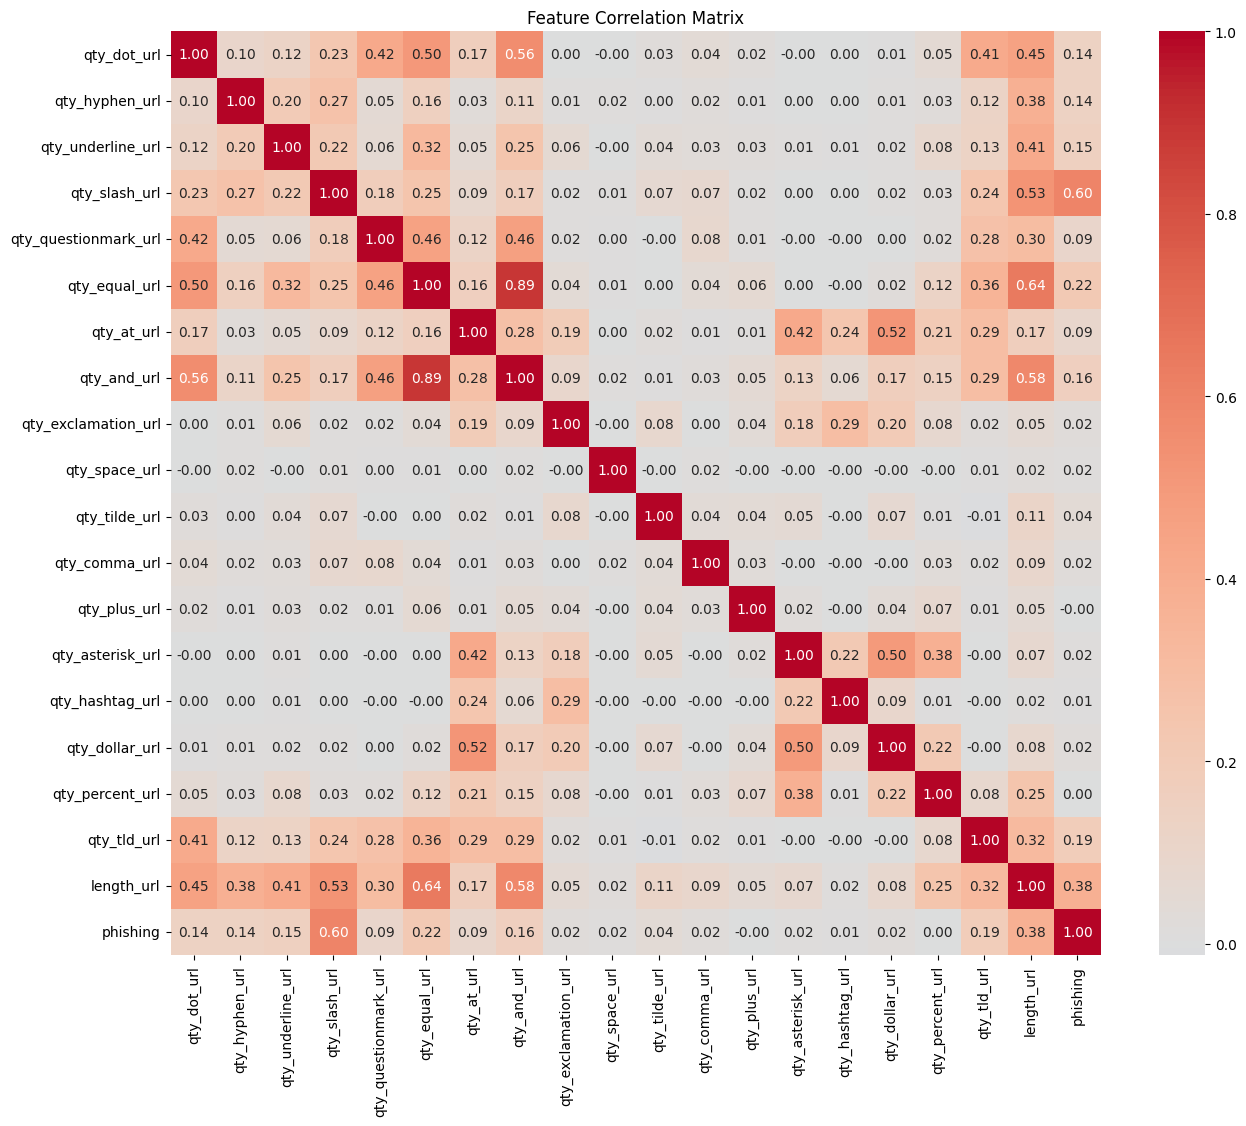

In [58]:
plt.figure(figsize=(15, 12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

#### Mengidentifikasi 10 fitur teratas

In [59]:
top_features = corr_matrix['phishing'].abs().sort_values(ascending=False).index[1:11]
print("\n Features most correlated with target:")
print(top_features)


 Features most correlated with target:
Index(['qty_slash_url', 'length_url', 'qty_equal_url', 'qty_tld_url',
       'qty_and_url', 'qty_underline_url', 'qty_hyphen_url', 'qty_dot_url',
       'qty_questionmark_url', 'qty_at_url'],
      dtype='object')


#### Memeriksa distribusi fitur dengan kelas target

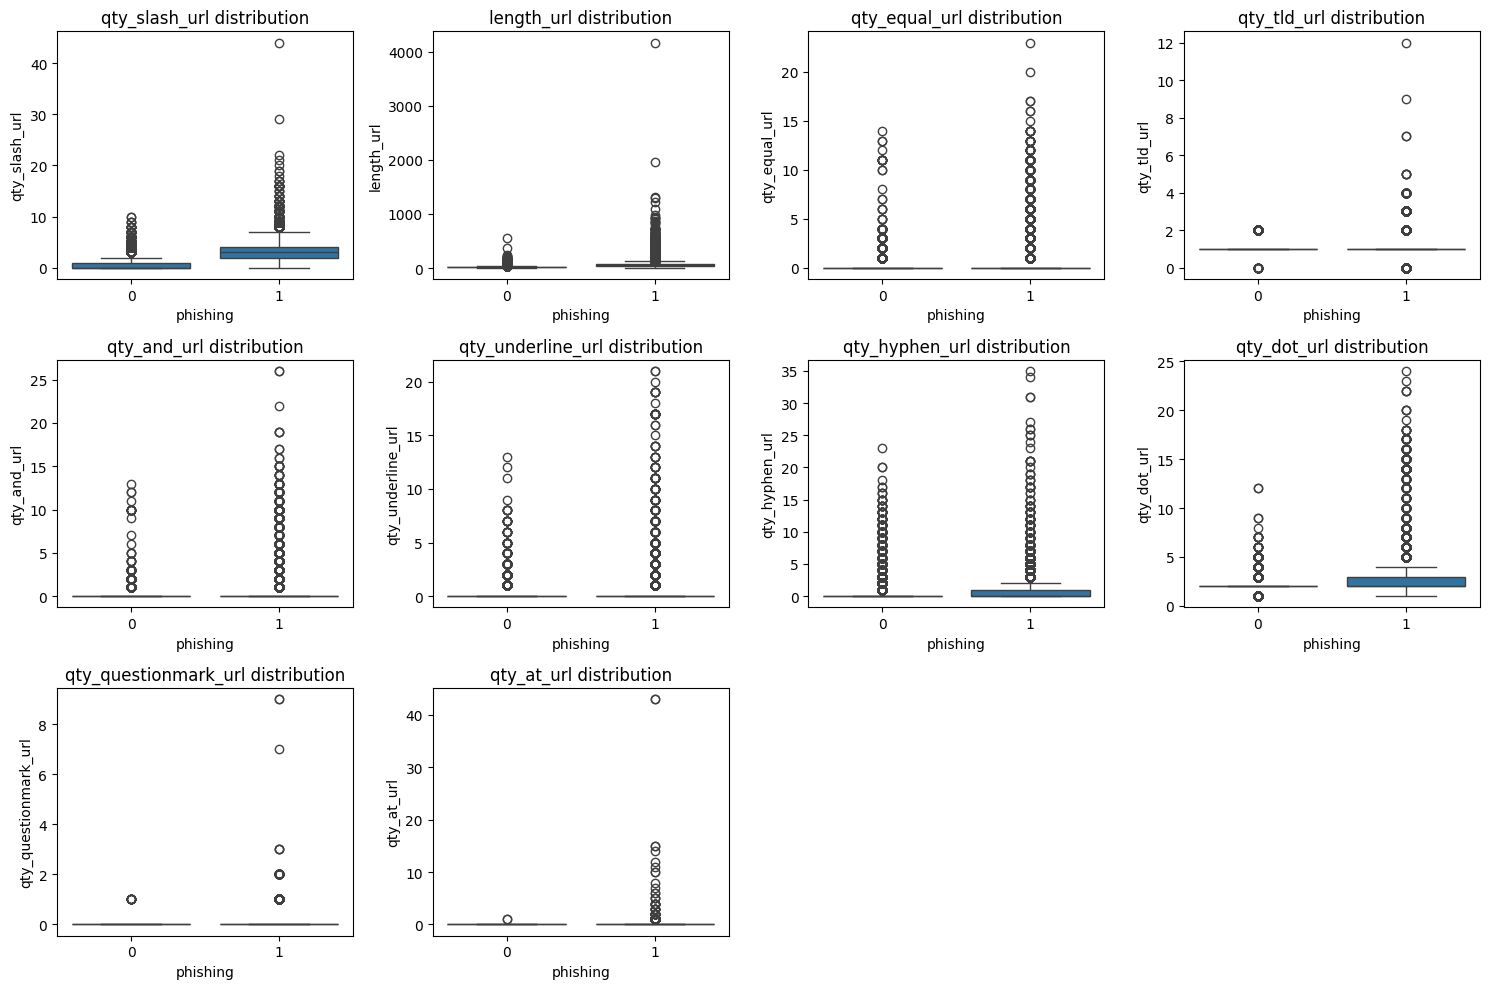

In [60]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='phishing', y=feature, data=df)
    plt.title(f'{feature} distribution')
plt.tight_layout()
plt.show()

### Data Preprocessing

#### Feature Engineering Consideration

In [61]:
df['special_char_ratio'] = (df['qty_dot_url'] + df['qty_hyphen_url'] + df['qty_underline_url'] + 
                           df['qty_slash_url'] + df['qty_questionmark_url'] + df['qty_equal_url'] + 
                           df['qty_at_url'] + df['qty_and_url'] + df['qty_exclamation_url'] + 
                           df['qty_space_url'] + df['qty_tilde_url'] + df['qty_comma_url'] + 
                           df['qty_plus_url'] + df['qty_asterisk_url'] + df['qty_hashtag_url'] + 
                           df['qty_dollar_url'] + df['qty_percent_url']) / df['length_url']

print("\nCorrelation of new feature with target:", df['special_char_ratio'].corr(df['phishing']))


Correlation of new feature with target: -0.08620295713698216


In [62]:
X = df.drop('phishing', axis=1)
y = df['phishing']

In [63]:
selector = SelectKBest(f_classif, k=15)
X_selected = selector.fit_transform(X, y)

In [64]:
selected_features = X.columns[selector.get_support()]
print("\nSelected features:")
print(selected_features)

X = X[selected_features]


Selected features:
Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_tilde_url', 'qty_comma_url',
       'qty_dollar_url', 'qty_tld_url', 'length_url', 'special_char_ratio'],
      dtype='object')


### Splitting Data

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTrain set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Train set shape: (46916, 15)
Test set shape: (11729, 15)


#### Handling Imbalance Class

In [66]:
print("\nTraining set class distribution:")
print(y_train.value_counts(normalize=True))


Training set class distribution:
phishing
1    0.522594
0    0.477406
Name: proportion, dtype: float64


In [67]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [68]:
print("\nAfter SMOTE class distribution:")
print(pd.Series(y_train_res).value_counts(normalize=True))


After SMOTE class distribution:
phishing
1    0.5
0    0.5
Name: proportion, dtype: float64


Output menunjukkan bahwa kelas-kelas pada set pelatihan sekarang seimbang (50% untuk kelas 0 dan 50% untuk kelas 1). Ini akan membantu model belajar dari kedua kelas secara lebih merata.

#### Feature Scaling

In [69]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train_res)

X_test_scaled = scaler.transform(X_test)

### Modeling

#### 1. Logistic Regression Model

In [70]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train_res)

y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

#### Evaluasi hasil training Logistic Regression Model

In [71]:
print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82      5600
           1       0.87      0.76      0.81      6129

    accuracy                           0.81     11729
   macro avg       0.82      0.82      0.81     11729
weighted avg       0.82      0.81      0.81     11729

Accuracy: 0.8148179725466792


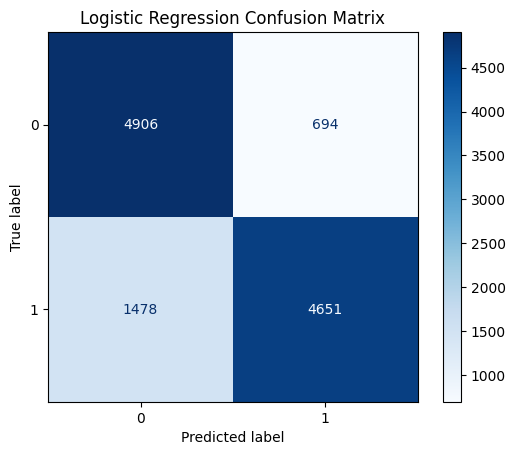

In [72]:
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

plt.title('Logistic Regression Confusion Matrix')
plt.show()

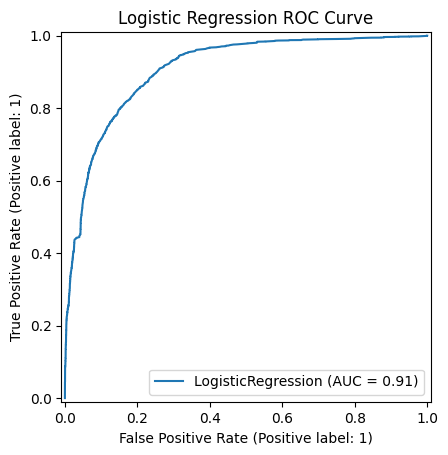

In [73]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(lr, X_test_scaled, y_test)
plt.title('Logistic Regression ROC Curve')
plt.show()


#### 2. Support Vector Machine Model

In [74]:
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_scaled, y_train_res)

y_pred_svm = svm.predict(X_test_scaled)
y_prob_svm = svm.predict_proba(X_test_scaled)[:, 1]

#### Evaluasi hasil training SVM Model

In [75]:
print("\nSVM Performance:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Performance:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      5600
           1       0.87      0.83      0.85      6129

    accuracy                           0.85     11729
   macro avg       0.85      0.85      0.85     11729
weighted avg       0.85      0.85      0.85     11729

Accuracy: 0.847557336516327


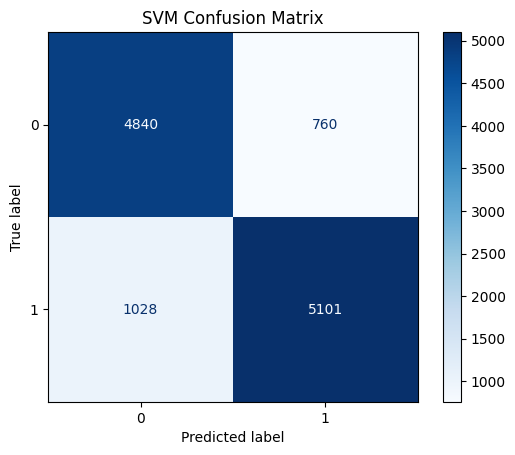

In [76]:
ConfusionMatrixDisplay.from_estimator(svm, X_test_scaled, y_test, cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.show()

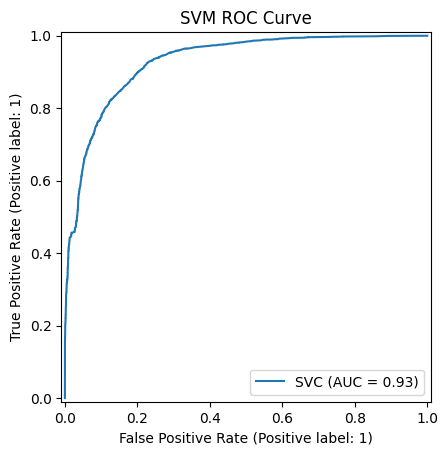

In [77]:
RocCurveDisplay.from_estimator(svm, X_test_scaled, y_test)
plt.title('SVM ROC Curve')
plt.show()

#### 3. Random Forest Model

In [78]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

In [79]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                          cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train_res)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


c:\Program Files\Python310\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
217 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Program Files\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Program Files\Python310\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Program Files\Python310\lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "c:\Program Files\Python310\lib

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [80]:
print("\nBest parameters:", grid_search.best_params_)


Best parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [81]:
best_rf = grid_search.best_estimator_

y_pred_rf = best_rf.predict(X_test_scaled)
y_prob_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

#### Evaluasi hasil training Random Forest Model

In [82]:
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      5600
           1       0.87      0.88      0.87      6129

    accuracy                           0.86     11729
   macro avg       0.86      0.86      0.86     11729
weighted avg       0.86      0.86      0.86     11729

Accuracy: 0.8647796061045272


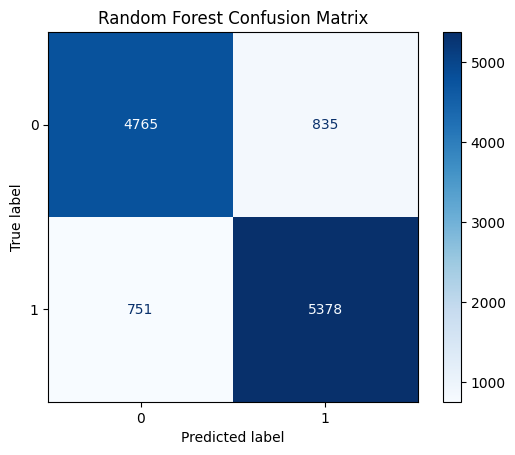

In [83]:
ConfusionMatrixDisplay.from_estimator(best_rf, X_test_scaled, y_test, cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

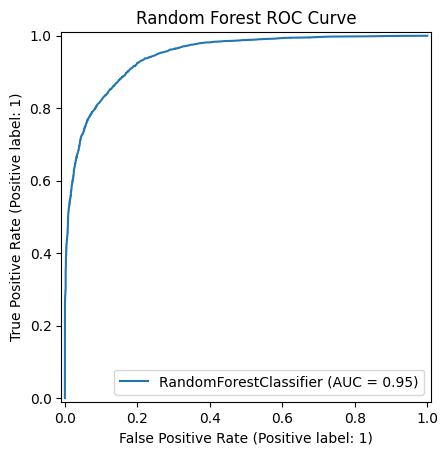

In [84]:
RocCurveDisplay.from_estimator(best_rf, X_test_scaled, y_test)
plt.title('Random Forest ROC Curve')
plt.show()

#### Menganalisis hasil evaluasi fitur yang paling berpengaruh dalam proses training model

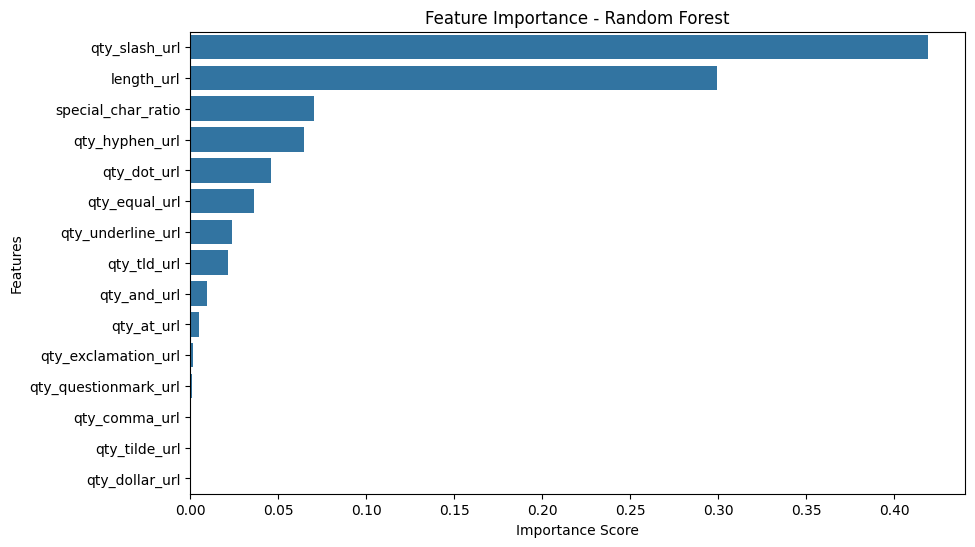

In [85]:
feature_imp = pd.Series(best_rf.feature_importances_, index=selected_features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

### Best Model Selection

In [86]:
models = {
    'Logistic Regression': y_prob_lr,
    'SVM': y_prob_svm,
    'Random Forest': y_prob_rf
}

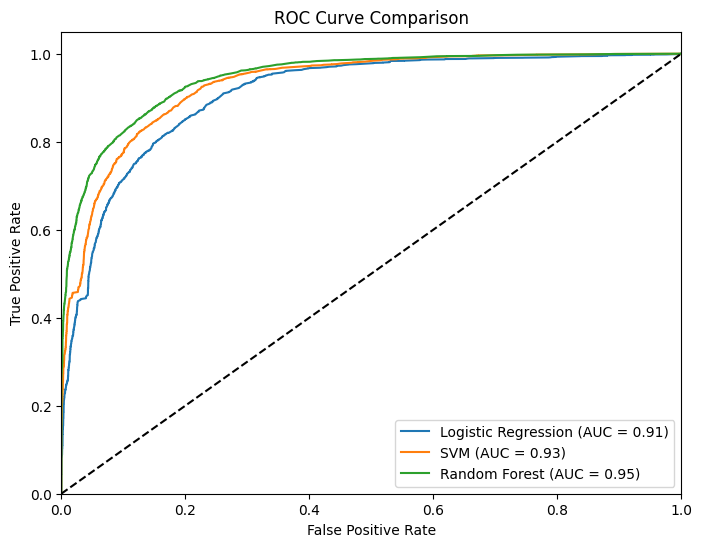

In [87]:
plt.figure(figsize=(8, 6))
for name, y_prob in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

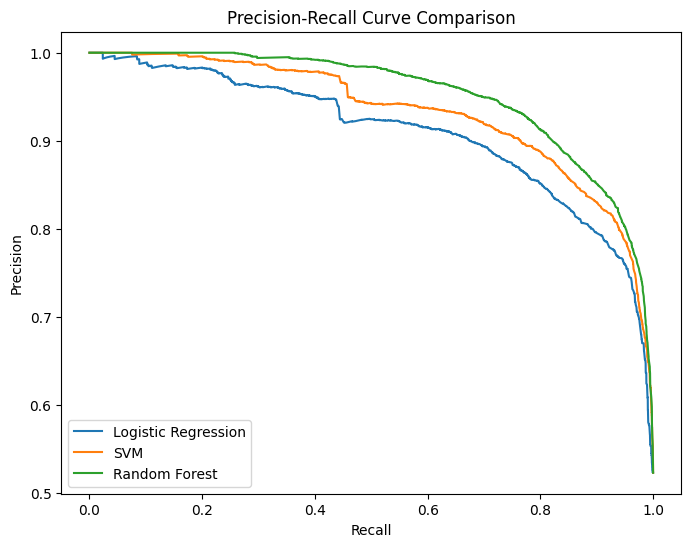

In [88]:
plt.figure(figsize=(8, 6))
for name, y_prob in models.items():
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(recall, precision, label=f'{name}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc="lower left")
plt.show()

In [89]:
best_model = best_rf
joblib.dump(best_model, 'phishing_detection_rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(selector, 'feature_selector.pkl')

['feature_selector.pkl']

### Hasil Inference

In [90]:
scaler = joblib.load('scaler.pkl')
selector = joblib.load('feature_selector.pkl')
model = joblib.load('phishing_detection_rf_model.pkl')

In [91]:
def extract_features(url):
    parsed = urlparse(url)
    
    features = {
        'qty_dot_url': url.count('.'),
        'qty_hyphen_url': url.count('-'),
        'qty_underline_url': url.count('_'),
        'qty_slash_url': url.count('/'),
        'qty_questionmark_url': url.count('?'),
        'qty_equal_url': url.count('='),
        'qty_at_url': url.count('@'),
        'qty_and_url': url.count('&'),
        'qty_exclamation_url': url.count('!'),
        'qty_space_url': url.count(' '),
        'qty_tilde_url': url.count('~'),
        'qty_comma_url': url.count(','),
        'qty_plus_url': url.count('+'),
        'qty_asterisk_url': url.count('*'),
        'qty_hashtag_url': url.count('#'),
        'qty_dollar_url': url.count('$'),
        'qty_percent_url': url.count('%'),
        'qty_tld_url': len(parsed.netloc.split('.')[-1]) if parsed.netloc else 0,
        'length_url': len(url),
        'special_char_ratio': (url.count('.') + url.count('-') + url.count('_') + 
                              url.count('/') + url.count('?') + url.count('=') + 
                              url.count('@') + url.count('&') + url.count('!') + 
                              url.count(' ') + url.count('~') + url.count(',') + 
                              url.count('+') + url.count('*') + url.count('#') + 
                              url.count('$') + url.count('%')) / len(url) if len(url) > 0 else 0
    }
    
    return pd.DataFrame([features])

In [92]:
def predict_url(url):
    try:
        features_df = extract_features(url)
        
        selected_features = selector.transform(features_df)
        
        scaled_features = scaler.transform(selected_features)
        
        prediction = model.predict(scaled_features)
        probability = model.predict_proba(scaled_features)
        
        result = {
            'url': url,
            'prediction': 'Phishing' if prediction[0] == 1 else 'Legitimate',
            'phishing_probability': f"{probability[0][1]*100:.2f}%",
            'legitimate_probability': f"{probability[0][0]*100:.2f}%"
        }
        
        return result
    
    except Exception as e:
        return {'error': str(e)}

In [97]:
if __name__ == "__main__":
    test_urls = [
        "www.google.com",
        "http://paypal-verify-account.com/login.php",
        "hhttps://link.dana.id/kaget?c=snqw25mpx&r=b7NAEX",
        "https://linkdanaa-kaget.webssit3.my.id/int.html"
        "https://1xlite-9231274.top/id/registration?type=email&bonus=SPORT"
    ]
    
    print("Phishing URL Detection Results:")
    print("="*50)
    
    for url in test_urls:
        result = predict_url(url)
        if 'error' not in result:
            print(f"\nURL: {result['url']}")
            print(f"Prediction: {result['prediction']}")
            print(f"Phishing Probability: {result['phishing_probability']}")
            print(f"Legitimate Probability: {result['legitimate_probability']}")
            print("-"*50)
        else:
            print(f"Error processing URL: {url}")
            print(f"Error: {result['error']}")

Phishing URL Detection Results:

URL: www.google.com
Prediction: Legitimate
Phishing Probability: 34.81%
Legitimate Probability: 65.19%
--------------------------------------------------

URL: http://paypal-verify-account.com/login.php
Prediction: Phishing
Phishing Probability: 96.31%
Legitimate Probability: 3.69%
--------------------------------------------------

URL: hhttps://link.dana.id/kaget?c=snqw25mpx&r=b7NAEX
Prediction: Phishing
Phishing Probability: 75.09%
Legitimate Probability: 24.91%
--------------------------------------------------

URL: https://linkdanaa-kaget.webssit3.my.id/int.htmlhttps://1xlite-9231274.top/id/registration?type=email&bonus=SPORT
Prediction: Phishing
Phishing Probability: 99.48%
Legitimate Probability: 0.52%
--------------------------------------------------


c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
